In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt

2024-07-09 00:10:24.950815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 00:10:24.962258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 00:10:24.962278: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 00:10:24.969571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 00:10:25.378755: W tensorflow/co

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

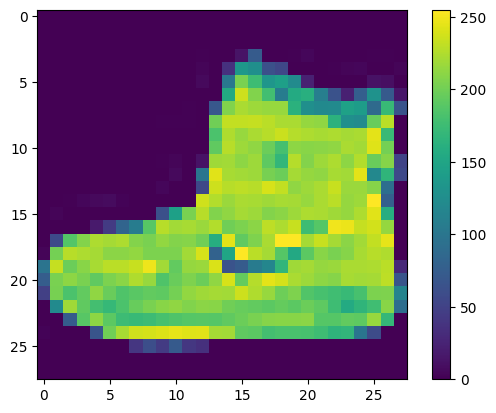

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
x_train = x_train/255
x_test = x_test/255

model = tf.keras.Sequential(
    [
        layers.Flatten(input_shape = (28,28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ]
)

/home/8kesar/Filez/MathematicsProjects&Modeling/venv1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-07-09 00:10:26.681371: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-07-09 00:10:26.681389: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: predator-on-arch-btw
2024-07-09 00:10:26.681392: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: predator-on-arch-btw
2024-07-09 00:10:26.681437: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 550.90.7
2024-07-09 00:10:26.681444: I external/local_xla/xla/stream_executor/cuda/c

In [6]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.fit(x_train, y_train, verbose=2, epochs= 10)
model.evaluate(x_test,y_test, verbose= 2)

Epoch 1/10
1875/1875 - 2s - 898us/step - accuracy: 0.8249 - loss: 0.4997
Epoch 2/10
1875/1875 - 2s - 828us/step - accuracy: 0.8621 - loss: 0.3822
Epoch 3/10
1875/1875 - 2s - 848us/step - accuracy: 0.8755 - loss: 0.3407
Epoch 4/10
1875/1875 - 2s - 868us/step - accuracy: 0.8843 - loss: 0.3137
Epoch 5/10
1875/1875 - 2s - 868us/step - accuracy: 0.8900 - loss: 0.2976
Epoch 6/10
1875/1875 - 1s - 735us/step - accuracy: 0.8953 - loss: 0.2819
Epoch 7/10
1875/1875 - 1s - 760us/step - accuracy: 0.8999 - loss: 0.2703
Epoch 8/10
1875/1875 - 2s - 801us/step - accuracy: 0.9033 - loss: 0.2576
Epoch 9/10
1875/1875 - 2s - 902us/step - accuracy: 0.9085 - loss: 0.2490
Epoch 10/10
1875/1875 - 2s - 898us/step - accuracy: 0.9108 - loss: 0.2412
313/313 - 0s - 507us/step - accuracy: 0.8825 - loss: 0.3479


[0.34786832332611084, 0.8824999928474426]

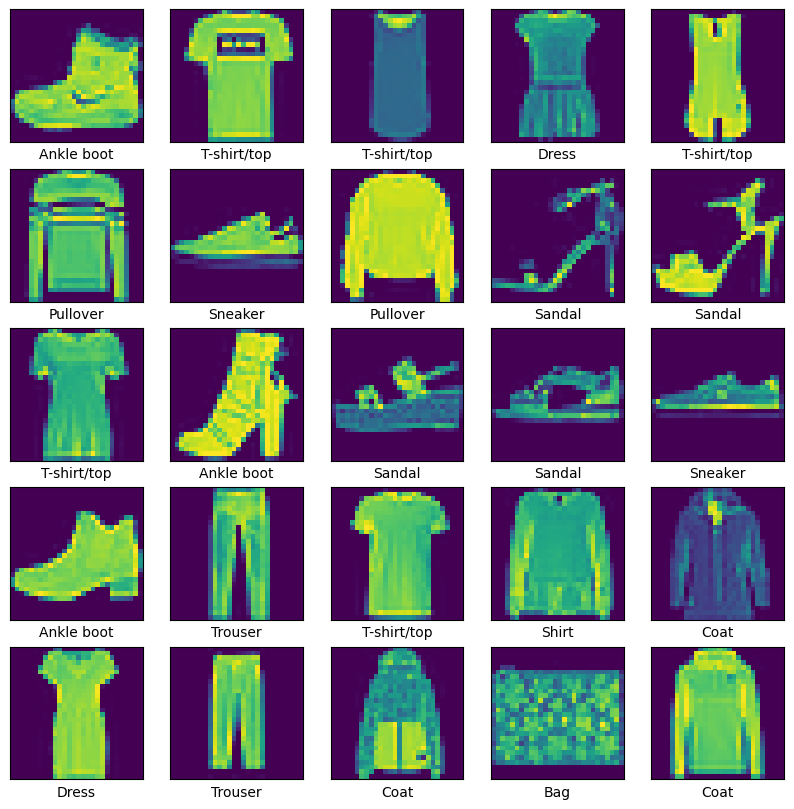

In [7]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [28]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
[[1.1233294e-06 2.3660013e-12 1.5470449e-09 ... 1.0326011e-02
  1.5069091e-07 9.8882425e-01]
 [1.0376666e-04 1.8865023e-13 9.9687278e-01 ... 3.4829019e-18
  3.5255197e-09 4.9137838e-12]
 [4.1507993e-09 9.9999994e-01 1.9028397e-10 ... 1.1743325e-26
  5.0708329e-14 4.7950137e-24]
 ...
 [8.7494718e-06 3.0190306e-12 3.5776281e-07 ... 3.8748347e-08
  9.9997288e-01 7.5132921e-11]
 [7.3660675e-07 9.9998409e-01 5.6600205e-09 ... 7.4004324e-19
  4.0431544e-08 5.4904093e-14]
 [4.5783836e-06 4.6537338e-10 4.7684260e-08 ... 8.2708447e-04
  7.5591219e-05 3.7315647e-06]]


In [34]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

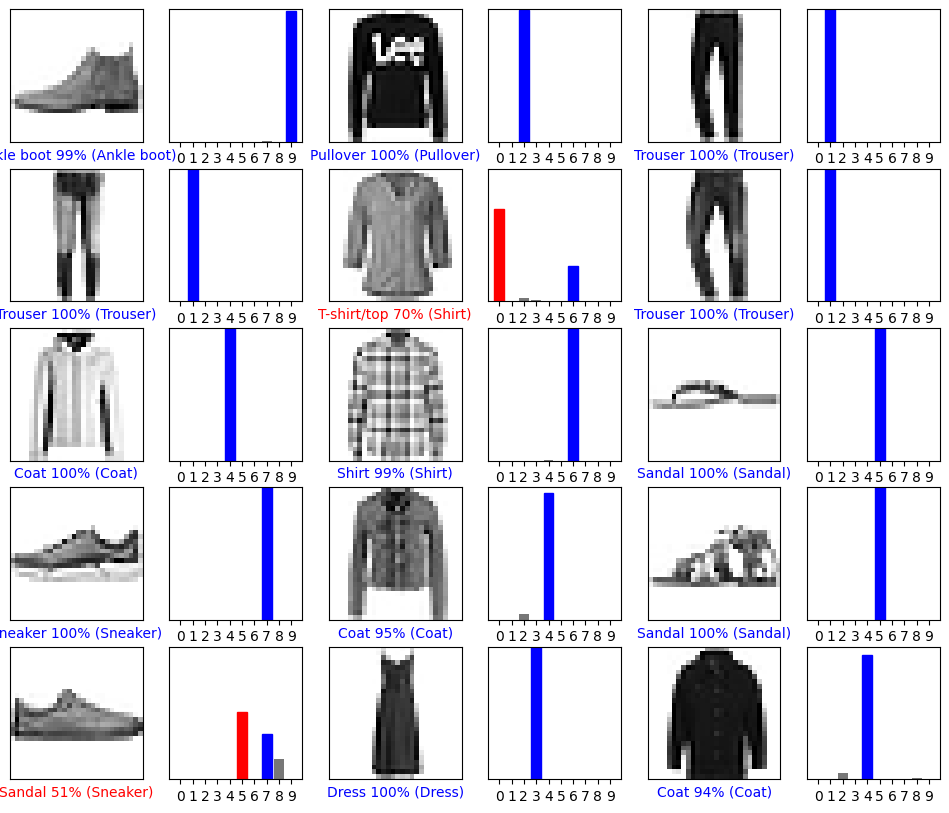

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.show()

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


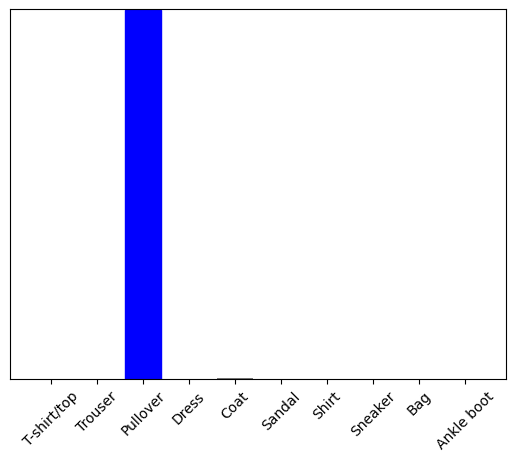

In [22]:
img = x_test[1]
print(img.shape)
img = np.expand_dims(img,0)
img.shape
prediction = probability_model.predict(img)
plot_value_array(1, prediction[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()